In [1]:
%pylab inline
import numpy as np #  convert list to array

import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import fmin

from scipy.integrate import * # az integráló rutinok betöltése

Populating the interactive namespace from numpy and matplotlib


### The generating function for tea-cup type cusp caustics:  
$$\Phi(s,C) = \sqrt{1-s^2}+\sqrt{(\sqrt{1-s^2}-C_1)^2+(s-C_2)^2},$$

where $s$ is the impact parameter of the incident light (here the radius of the circle is $R=1$), 
and $C_1, C_2$ are the coordinates of the ray at its final point.


### The caustic parameteric equation:

\begin{eqnarray}
x_c &=& \left[1-\frac{1}{2}\,\cos(2 \alpha)\right] \cos\alpha, \\ 
y_c &=& \sin^3(\alpha)
\end{eqnarray}

Refs:

[1) Berry, M V, 1981, ‘Singularities in Waves’ in Les Houches Lecture Series Session XXXV, eds. R Balian, M Kléman and J-P Poirier, North-Holland: Amsterdam, 453-543. 
](https://michaelberryphysics.files.wordpress.com/2013/07/berry105.pdf)

[2) Berry, M V, & Upstill, C, 1980 Progress in Optics XVIII, 257-346, ‘Catastrophe optics: morphologies of caustics and their diffraction patterns’.](https://michaelberryphysics.files.wordpress.com/2013/07/berry089.pdf)


### Canonical form (expansion in $s$ up to 4th order and first order in $C_1$ and $C_2$): 

$$\Phi(s,C) \approx  (2 - C_1) -4 s\, C_1 C_2 + (2 C_1-1)\, s^2 + 2 C_2 (8 C_1 -3 )\, s^3 + (3/4 - 2 C_1)\, s^4  $$

In [2]:
def Lopt(s,C1,C2):
    
    L=sqrt(1-s**2)+sqrt((sqrt(1-s**2)-C1)**2+(s-C2)**2)
    
    return L

def Lopt_approx(s,C1,C2):

    res= (2 - C1) -4*s*C1*C2 + (-1 + 2*C1)*s**2 + 2*C2*(-3+8*C1)*s**3 + (3/4 - 2*C1)*s**4 
    return res
    
def der_Lopt(s,C1,C2):
  
    der=(-s + (s*C1 - sqrt(1 - s**2)*C2)/
         sqrt((sqrt(1-s**2)-C1)**2+(s-C2)**2))/sqrt(1 - s**2)
    
    return der

In [3]:
def caustic_curve(szog):
    
    xc = (2-cos(2*szog))*cos(szog)/2
    yc = (sin(szog))**3
    return(xc,yc)


In [4]:
C1a,C2a=(0.8,-0.4)
Lopt(1,C1a,C2a),sqrt(C1a**2+(1-C2a)**2)

(1.6124515496597098, 1.6124515496597098)

/home/cserti/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


C1, C2 =  (0.6, 0.1)
s_extremum =  [-0.6048265704120646, 0.45280105391953435, 0.45329414459899203]


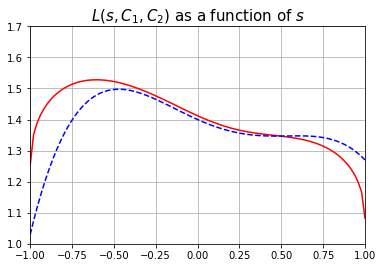

In [5]:
C1,C2=(0.6,0.1)

s=linspace(-1,1,100)

fig, ax = plt.subplots()

plot(s,Lopt(s,C1,C2),'r-')
plot(s,Lopt_approx(s,C1,C2),'b--')

# Use the numerical solver to find the roots

s_initial_guess = [-0.7,0.2,0.7]
s_extremum=[]
for s_tmp in s_initial_guess: 
     s_extremum.append(fsolve(der_Lopt, s_tmp,args=(C1,C2))[0])

title(r'$L(s,C_1,C_2)$ as a function of $s$', fontsize=15)

xlim(-1,1.)
ylim(1, 1.7)

grid();

print("C1, C2 = ",(C1,C2))
print("s_extremum = ", s_extremum)

In [6]:
smin=fmin(Lopt,0.2,args=(C1,C2))
smin

Optimization terminated successfully.
         Current function value: 1.082013
         Iterations: 43
         Function evaluations: 86


/home/cserti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.99999969])

C1, C2 =  (0.6, 0.1)
s_extremum =  [-0.6048265704120646, 0.45280105391953435, 0.45329414459899203]


/home/cserti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


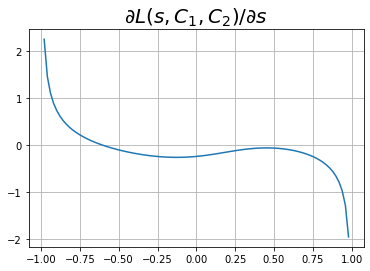

In [7]:
plot(s,der_Lopt(s,C1,C2))
title(r'$\partial L(s,C_1,C_2)/\partial s$', fontsize=20)
grid();
print("C1, C2 = ",(C1,C2))
print("s_extremum = ", s_extremum)

### The stationary points inside the cuastic curve

There are 3 stationary points $s^\mu$ ($\mu =1,2,3$) when in the 'control space' the point given by the control parameters $C=(C_1,C_2)$ is 
inside the caustic curve. 

C1, C2 =  (0.702, 0.25)
s_extremum =  [-0.7040978166480387, 0.570024859332517, 0.6864124422671627]


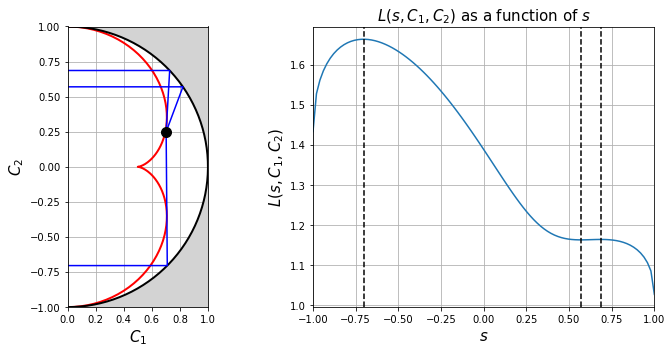

In [8]:
C1,C2=(0.702,0.25)


fig = figure(figsize=(10,5))
#fig, (ax1, ax2) = subplots(1, 2,figsize=(8,4))

ax1=plt.subplot(121)

t = linspace(-pi/2,pi/2,200)
xc,yc=caustic_curve(t)
plot(xc,yc, 'r-', lw=2)

plot(cos(t), sin(t), color='k', linewidth=2.0) 

# Use the numerical solver to find the roots

s_initial_guess = [-0.7,0.27,0.7]
s_extremum=[]
for s_tmp in s_initial_guess: 
     s_extremum.append(fsolve(der_Lopt, s_tmp,args=(C1,C2))[0])

#  plotting rays

for s_ext in s_extremum:
    rayx=array([0,sqrt(1-s_ext**2),C1])
    rayy=array([s_ext,s_ext,C2])
    plot(rayx,rayy,'b-')
      
plot(C1,C2,'o',markersize=10,color='k')

#########  kitakaras 
# kitakart resz szurkevel van betoltve

x = linspace(0,1,200)
y1 = -sqrt(1 -x**2)
y2 = sqrt(1 -x**2)
y3=[1]
y4=[-1]

## zorder=2 ---> a nagyobb 'zorder'  abra van fent (top).
# Filling between line y2 and line y3
#fill_between(x, y1, y4, color='lightblue', alpha='0.5',zorder=2)
fill_between(x, y2, y3, color='lightgrey',zorder=2)

# Filling between line y1 and line y4
#fill_between(x, y1, y4, color='lightyellow', alpha='0.5',zorder=2)
fill_between(x, y1, y4, color='lightgray',zorder=2)

#########  kitakaras VEGE 

xlim(0,1.)
ylim(-1, 1)

ax1.set_aspect(1)
#ax.set_aspect('equal')
#axes().set_aspect('equal')
#axis("equal")

major_ticksx = arange(0, 1.01, 0.2)
major_ticksy = arange(-1, 1.01, 0.25)
#minor_ticks = arange(-1, 1, 5)

ax1.set_xticks(major_ticksx)
#ax1.set_xticks(minor_ticks, minor=True)
ax1.set_yticks(major_ticksy)
#ax1.set_yticks(minor_ticks, minor=True)

xlabel(r'$C_1$',fontsize=15)
ylabel(r'$C_2$',fontsize=15)

grid()

ax2=subplot(1, 2, 2)

s=linspace(-1,1,100)
plot(s,Lopt(s,C1,C2))
title(r'$L(s,C_1,C_2)$ as a function of $s$', fontsize=15)

for x_ in s_extremum:
        axvline(x=x_,color='k',ls='--')

xlabel(r'$s$',fontsize=15)
ylabel(r'$L(s,C_1,C_2)$',fontsize=15)

xlim(-1,1.)
#ylim(-1, 1)


grid();

#ax.set_aspect(1)

tight_layout(pad=1)

print("C1, C2 = ",(C1,C2))
print("s_extremum = ", s_extremum)

In [9]:
##  adott yc= C2 eseten, hol van a kausztika xc koordinataja: 
C2=0.25
szog = arcsin(C2**(1/3))
xc0,yc0=caustic_curve(szog)
xc0,yc0

(0.6965182677030355, 0.25)

### The stationary points coalesce

As the coordinates of the control parameters $C=(C_1,C_2)$ move onto a caustic, **two** (generally  can be more) stationary points **coalesce**, so that $\partial^2 \Phi(s,C)/\partial s^2$ becomes zero at this stationary point. 

C1, C2 =  (0.6965182677030355, 0.25)
s_extremum =  [-0.7008288725351125, 0.629960525574565, 0.6299605324353251]


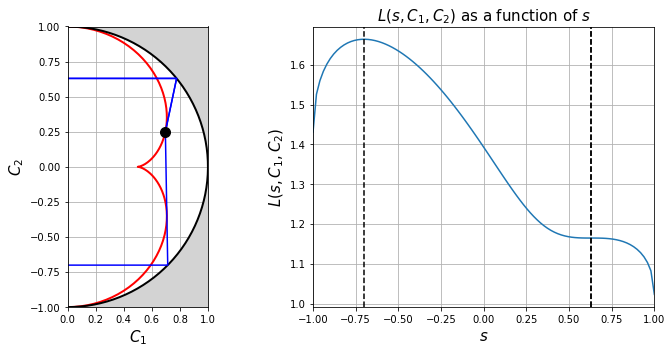

In [10]:
#C1,C2=(0.7,0.25)
#C1,C2=(0.7,0.25)  ----> eppen a kausztikan van

##  adott yc= C2 eseten, hol van a kausztika xc koordinataja: 
C2=0.25
szog = arcsin(C2**(1/3))
C1, C2 = caustic_curve(szog)

fig = figure(figsize=(10,5))
#fig, (ax1, ax2) = subplots(1, 2,figsize=(8,4))

ax1=plt.subplot(121)

t = linspace(-pi/2,pi/2,200)
xc,yc=caustic_curve(t)
plot(xc,yc, 'r-', lw=2)

plot(cos(t), sin(t), color='k', linewidth=2.0) 

# Use the numerical solver to find the roots

s_initial_guess = [-0.7,0.2,0.7]
s_extremum=[]
for s_tmp in s_initial_guess: 
     s_extremum.append(fsolve(der_Lopt, s_tmp,args=(C1,C2))[0])

#  plotting rays

for s_ext in s_extremum:
    rayx=array([0,sqrt(1-s_ext**2),C1])
    rayy=array([s_ext,s_ext,C2])
    plot(rayx,rayy,'b-')
      
plot(C1,C2,'o',markersize=10,color='k')

#########  kitakaras 
# kitakart resz szurkevel van betoltve

x = linspace(0,1,200)
y1 = -sqrt(1 -x**2)
y2 = sqrt(1 -x**2)
y3=[1]
y4=[-1]

## zorder=2 ---> a nagyobb 'zorder'  abra van fent (top).
# Filling between line y2 and line y3
#fill_between(x, y1, y4, color='lightblue', alpha='0.5',zorder=2)
fill_between(x, y2, y3, color='lightgrey',zorder=2)

# Filling between line y1 and line y4
#fill_between(x, y1, y4, color='lightyellow', alpha='0.5',zorder=2)
fill_between(x, y1, y4, color='lightgray',zorder=2)

#########  kitakaras VEGE 

xlim(0,1.)
ylim(-1, 1)

ax1.set_aspect(1)
#ax.set_aspect('equal')
#axes().set_aspect('equal')
#axis("equal")

major_ticksx = arange(0, 1.01, 0.2)
major_ticksy = arange(-1, 1.01, 0.25)
#minor_ticks = arange(-1, 1, 5)

ax1.set_xticks(major_ticksx)
#ax1.set_xticks(minor_ticks, minor=True)
ax1.set_yticks(major_ticksy)
#ax1.set_yticks(minor_ticks, minor=True)

xlabel(r'$C_1$',fontsize=15)
ylabel(r'$C_2$',fontsize=15)

grid()

ax2=subplot(1, 2, 2)


s=linspace(-1,1,100)
plot(s,Lopt(s,C1,C2))
title(r'$L(s,C_1,C_2)$ as a function of $s$', fontsize=15)

for x_ in s_extremum:
        axvline(x=x_,color='k',ls='--')

        
xlabel(r'$s$',fontsize=15)
ylabel(r'$L(s,C_1,C_2)$',fontsize=15)

xlim(-1,1.)
#ylim(-1, 1)


grid();

#ax.set_aspect(1)

tight_layout(pad=1)

print("C1, C2 = ",(C1,C2))
print("s_extremum = ", s_extremum)